In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize,wordpunct_tokenize,wordnet,FreqDist,PorterStemmer
from nltk.tokenize import TweetTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt


### Loading Data

In [4]:
df = pd.read_csv("Covid_19_tweets_train.csv",encoding="latin1")
print(df.sample(20)) 

       UserName  ScreenName                Location     TweetAt  \
36499     40298       85250                     NaN  09-04-2020   
39750     43549       88501                     NaN  13-04-2020   
13870     17669       62621                     NaN  21-03-2020   
31591     35390       80342                 toronto  07-04-2020   
5670       9469       54421  San Francisco Bay Area  19-03-2020   
32404     36203       81155            New York, NY  07-04-2020   
9842      13641       58593                  London  20-03-2020   
11539     15338       60290                     NaN  20-03-2020   
24147     27946       72898          Leeds, England  26-03-2020   
37526     41325       86277        New Delhi, India  10-04-2020   
6689      10488       55440      Wokingham, England  19-03-2020   
17198     20997       65949                     NaN  23-03-2020   
21914     25713       70665                      NH  25-03-2020   
24769     28568       73520  Mountain View, CA, USA  27-03-202

# Data Preprocessing

In [5]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
import string

hashtags = []
def preprocess(text):
    # Lower case
    text = text.lower()
    # remove punct    
    table = str.maketrans('', '', string.punctuation.replace("#",''))
    text = text.translate(table)
    text = text.split()
    hashtags.extend([re.sub("#",'',word) for word in text if "#" in word])
    text = [re.sub("#",'',word) for word in text]
    
    # remove digits and strange symbol 
    text = [re.sub("(\d+|€+)",'',word) for word in text]
    
    # remove urls and empty tweet tags and whitespaces
    text = [word for word in text if re.match(r"^(https)",word) == None and word != "#"]
    text = [word for word in text if word != " "]
    text = " ".join(text)
   
    # remove strange encoding chars
    filters = " ".join(filter(lambda char: char not in string.printable, text))
    if len(filters) > 0:
        text = re.sub(f'[{filters}*]',' ',text)
    
    # tokinaztion
    tokanizer = TweetTokenizer()
    text = tokanizer.tokenize(text)
  
    # remove stopwords and single chars
    text = [t for t in text if t not in stop_words and len(t) > 1]
    lemmatizer = wordnet.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(w) for w in text]
#     hashtags.extend([word for word in text if "#" in word])
#     stemming
#     stemmer = PorterStemmer()
#     text = [stemmer.stem(w) for w in text]
    
    return " ".join(text)

In [7]:
df["CleanedTweet"] = df["OriginalTweet"].apply(lambda x:preprocess(x))

In [8]:
# remove empty cells 
df["CleanedTweet"].replace('',np.nan,inplace=True)
df.dropna(subset=["CleanedTweet"],inplace=True)
nan_value = float("NaN")

df["CleanedTweet"].replace("", nan_value, inplace=True)

df["CleanedTweet"].dropna(inplace=True)
df["CleanedTweet"].dropna()


0                              menyrbie philgahan chrisitv
1        advice talk neighbour family exchange phone nu...
2        coronavirus australia woolworth give elderly d...
3        food stock one empty please dont panic enough ...
4        ready go supermarket covid outbreak im paranoi...
                               ...                        
41152    airline pilot offering stock supermarket shelf...
41153    response complaint provided citing covid relat...
41154    know getting tough kameronwilds rationing toil...
41155    wrong smell hand sanitizer starting turn coron...
41156    tartiicat well newused rift going amazon rn al...
Name: CleanedTweet, Length: 41141, dtype: object

In [ ]:
df["CleanedTweet"].describe()

count                                     41141
unique                                    40934
top       online shopping way covid restriction
freq                                          7
Name: CleanedTweet, dtype: object

In [ ]:
df["OriginalTweet"].describe()

count                                                 41141
unique                                                41141
top       Tips on making requests on   Ask consumer prot...
freq                                                      1
Name: OriginalTweet, dtype: object

# Text Analysis

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter


In [14]:
# X_train = data["CleanedTweet"][:int(.75 * len(data["CleanedTweet"]))]
# X_test = data["CleanedTweet"][int(.75 * len(data["CleanedTweet"])):]
X = df["CleanedTweet"]
y = df["Sentiment"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)



In [153]:
trigram_cv = CountVectorizer(ngram_range=(1,3),min_df=1)
trigram_cv.fit(X)
vectorizer = trigram_cv.transform(X)

count_list = np.array(vectorizer.sum(axis=0).A1)
word_list = np.array(trigram_cv.get_feature_names())

# most common words
freq_distribution = Counter(dict(zip(word_list, count_list)))
print (freq_distribution.most_common(10))


[('covid', 21816), ('coronavirus', 18021), ('price', 8944), ('store', 8164), ('supermarket', 7734), ('food', 7222), ('grocery', 6737), ('people', 5609), ('consumer', 5169), ('grocery store', 5081)]


In [ ]:
freq_df = pd.DataFrame(freq_distribution.most_common(30),columns=['word','count'])
freq_df.head()


,word,count
0,covid,21816
1,coronavirus,18021
2,price,8944
3,store,8164
4,supermarket,7734


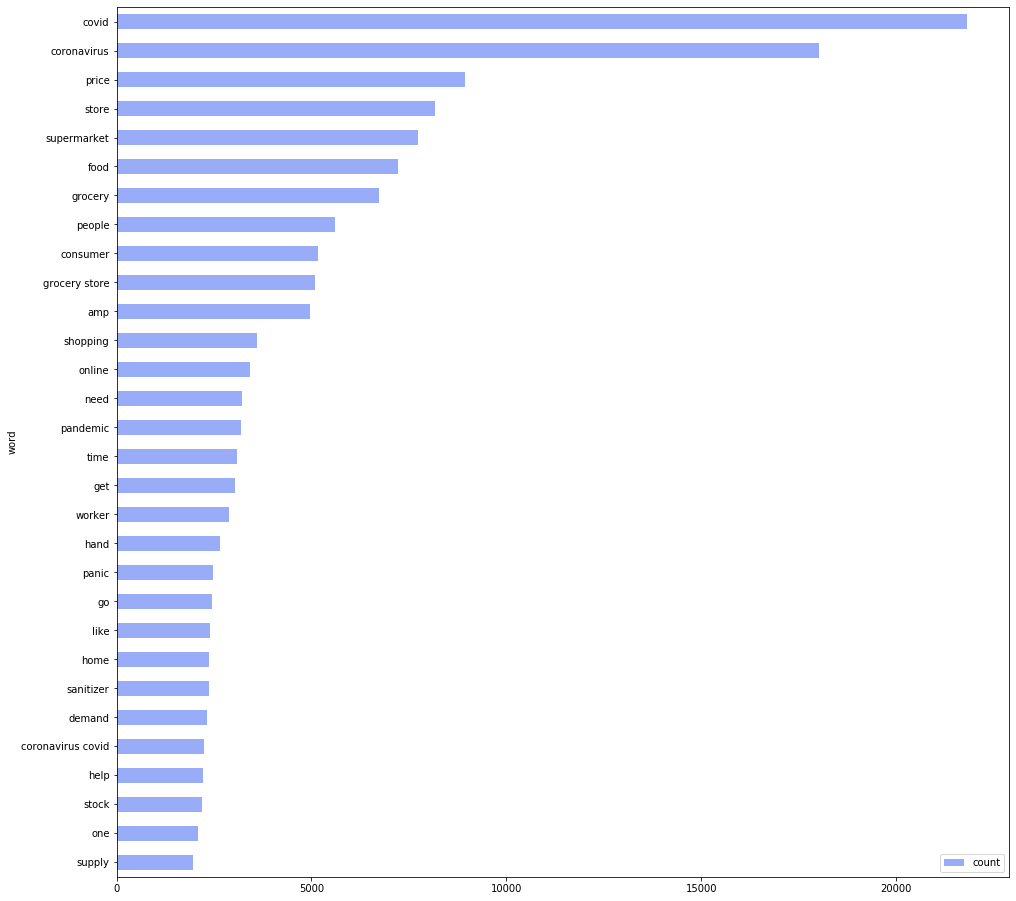

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
freq_df.sort_values(by='count').plot.barh(
x='word',y='count',ax=ax,color='#98acf8')
plt.show()

# Trending Topics

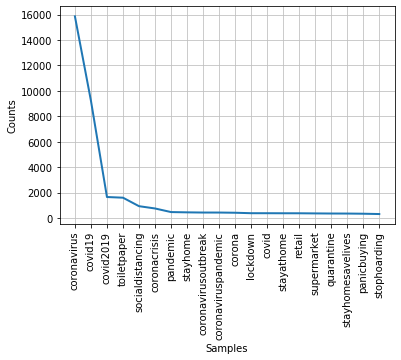

In [ ]:
hashtags_freq = FreqDist(hashtags)
hashtags_freq.plot(20)

### remove empty Locations

In [ ]:
df.dropna(subset=["Location"],inplace=True)
df["Location"].head(10)

0                        London
1                            UK
2                     Vagabonds
5     ÃT: 36.319708,-82.363649
6          35.926541,-78.753267
7                       Austria
8               Atlanta, GA USA
9              BHAVNAGAR,GUJRAT
10               Makati, Manila
11    Pitt Meadows, BC, Canada 
Name: Location, dtype: object

## plot frequency

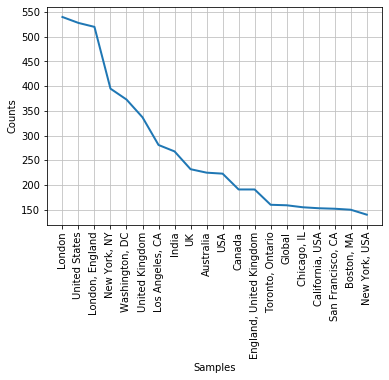

In [ ]:
hashtags_freq = FreqDist(df["Location"])
hashtags_freq.plot(20)

In [ ]:
pd.set_option('max_rows', None)
pd.set_option("max_colwidth", 80)



# Topic Modeling


In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
true_k = 3
docs = df["CleanedTweet"]
count_vec = CountVectorizer(stop_words=stop_words)
X = count_vec.fit_transform(docs)
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# y_kmeans = model.fit_predict(X)
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(docs)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

### trying with K = 3 

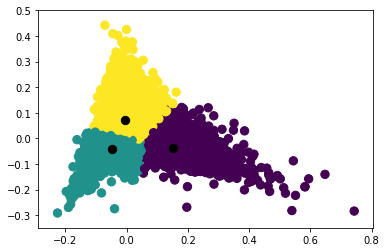

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
fitted = test_e.fit(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=70, cmap='viridis')
plt.scatter(test_e.cluster_centers_[:, 0], test_e.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )


# Find best K with Elbow Method

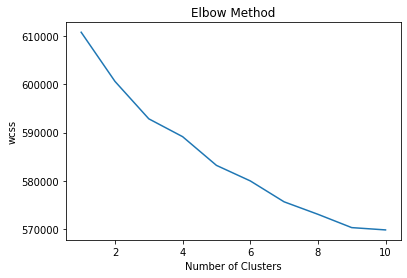

In [ ]:



wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


### Perfect value k = 6

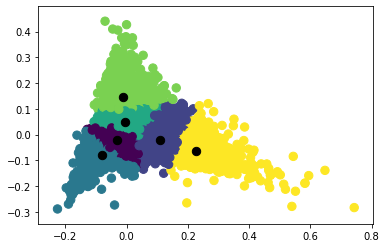

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= 6 , init='k-means++', max_iter=100, n_init=1)
fitted = kmeans.fit(Y_sklearn)
predicted_values = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=70, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )


### data starts mixing with k = 8

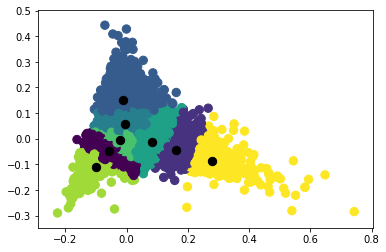

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= 8 , init='k-means++', max_iter=100, n_init=1)
fitted = kmeans.fit(Y_sklearn)
predicted_values = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=70, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )


### k = 10

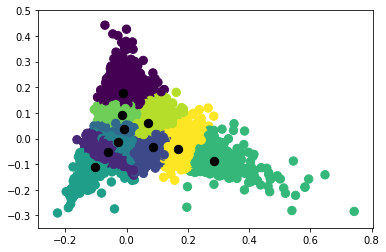

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= 10 , init='k-means++', max_iter=100, n_init=1)
fitted = kmeans.fit(Y_sklearn)
predicted_values = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=70, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )


.

.



# Language Models

In [11]:
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk import word_tokenize, sent_tokenize 
from nltk.util import trigrams

In [ ]:
n = 3


tri_tweet_generator = MLE(n)
train_tweets,padded_sent = padded_everygram_pipeline(n,list(docs.apply(word_tokenize)))

In [ ]:
tri_tweet_generator.fit(train_tweets,padded_sent)

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize
def generate_sent(model, num_words, random_seed=42):
    """
    :param model: An ngram language model from `nltk.lm.model`.
    :param num_words: Max no. of words to generate.
    :param random_seed: Seed value for random.
    """
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [ ]:
generate_sent(tri_tweet_generator,10,6)

'sale south korea detected day south korea retailer seen unprecedented'

# Sentiment Analysis

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### TF-IDF

In [15]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english')
tf_idf = tf_idf_vectorizor.fit_transform(X_train)
tf_idf_norm = normalize(tf_idf)
X_train_tf_idf = tf_idf_norm.toarray()

 

In [16]:
ridgeClassifier = RidgeClassifier()
ridgeClassifier.fit(X_train_tf_idf,y_train)

RidgeClassifier()

In [17]:
X_test_tfidf = tf_idf_vectorizor.transform(X_test)
y_test_predicted_labels_tfidf = ridgeClassifier.predict(X_test_tfidf)

print('Tfidf Accuracy: ' + str(accuracy_score(y_test, y_test_predicted_labels_tfidf)))

Tfidf Accuracy: 0.5329574178495042


In [18]:
clf = MultinomialNB()
clf.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [19]:
X_test_tfidf = tf_idf_vectorizor.transform(X_test)
y_test_predicted_labels_tfidf_NB = clf.predict(X_test_tfidf)
print('Naive Bayes Accuracy TF-IDF: ' + str(accuracy_score(y_test, y_test_predicted_labels_tfidf_NB)))
m

Naive Bayes Accuracy TF-IDF: 0.38780867198133384


### BOW


In [21]:
cv = CountVectorizer(ngram_range=(1,4))
X_train_cv = cv.fit_transform(X_train)

ridgeClassifier = RidgeClassifier()
ridgeClassifier.fit(X_train_cv,y_train)

RidgeClassifier()

In [22]:
X_test_cv = cv.transform(X_test)
y_test_predicted_cv = ridgeClassifier.predict(X_test_cv)

print('Count Vectorizer Accuracy: ' + str(accuracy_score(y_test, y_test_predicted_cv)))

Count Vectorizer Accuracy: 0.5357767839782228


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV


/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

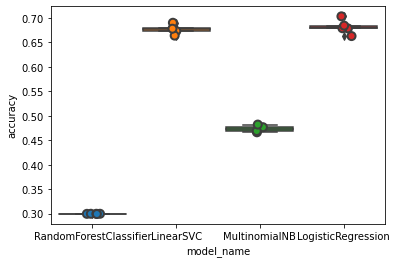

In [25]:


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_test_cv, y_test_predicted_cv, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [26]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.676939
LogisticRegression        0.681801
MultinomialNB             0.473460
RandomForestClassifier    0.299825
Name: accuracy, dtype: float64

In [ ]:
svc0 = CalibratedClassifierCV(LinearSVC(),cv=10)
svc= OneVsRestClassifier(svc0)

In [ ]:
svc.fit(X_train_tf_idf,y_train)

OneVsRestClassifier(estimator=CalibratedClassifierCV(base_estimator=LinearSVC(),
                                                     cv=10))

In [ ]:
prediction_svc = svc.predict(X_test_tfidf)
print('Linear SVC TF-IDF Accuracy: ' + str(accuracy_score(y_test, prediction_svc)))

Linear SVC TF-IDF Accuracy: 0.5643593233521291


### Linear SVC with Count Vectorizer

In [ ]:
svc.fit(X_train_cv,y_train)
prediction_svc = svc.predict(X_test_cv)
print('Linear SVC Accuracy: ' + str(accuracy_score(y_test, prediction_svc)))

/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Converge

Linear SVC Accuracy: 0.5880808866420377


### LogisticRegrission BOW

In [48]:
logistic = LogisticRegression()
logistic.fit(X_train_cv,y_train)
predict_log = logistic.predict(X_test_cv)
print('LogisticRegrission BOW Accuracy: ' + str(accuracy_score(y_test, predict_log)))

LogisticRegrission BOW Accuracy: 0.5796227882558818


/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LinearSVC 2 classes

In [ ]:
df[df["Sentiment"] == "Negative"]a

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,corona preventionwe stop buy thing cash use on...
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative,downingstreet grantshapps done ensure food ess...
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative,preparation higher demand potential food short...
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative,see malicious price increase nyc nyc departmen...
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative,country empty shelf people see buying ensues f...
...,...,...,...,...,...,...,...
41127,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getti...,Negative,today grocery store saw someone getting case c...
41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative,every human affliction gainer loser case covid...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,really shitting much home covid coronavirus to...
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked number toronto supermarket emplo...


In [ ]:
cols = {"Sentiment":df["Sentiment"],"CleanedTweet":df["CleanedTweet"]}
binary_df = pd.DataFrame(cols)
binary_df[binary_df["Sentiment"]=="Extremely Negative"] = "Negative"
binary_df[binary_df["Sentiment"] =="Extremely Positive"] = "Positive"
print(binary_df[binary_df["Sentiment"] == "Negative"].count()+binary_df[binary_df["Sentiment"] == "Positive"].count())


Sentiment       33444
CleanedTweet    33444
dtype: int64


In [ ]:
print(binary_df[binary_df["Sentiment"] == "Negative"].count()+binary_df[binary_df["Sentiment"] == "Positive"].count())
neutral = binary_df[binary_df["Sentiment"] == "Neutral"]
print(binary_df[binary_df["Sentiment"] == "Negative"].count()+binary_df[binary_df["Sentiment"] == "Positive"].count())


Sentiment       33444
CleanedTweet    33444
dtype: int64
Sentiment       33444
CleanedTweet    33444
dtype: int64


In [ ]:
mask = binary_df.loc[binary_df["Sentiment"] == "Neutral"][:len(neutral)//2 - 1]
mask["Sentiment"] = "Negative"

In [ ]:
counter = 0
for i,sentiment in enumerate(binary_df["Sentiment"]):
    if sentiment == "Neutral":
           counter +=1
           binary_df["Sentiment"][i] = "Negative"
    if i == len(neutral) // 2 - 1:
        break

for sentiment in binary_df["Sentiment"][len(neutral)//2:]:
    if sentiment == "Neutral":
        binary_df["Sentiment"][i] = "Positive"
    

In [ ]:
print(binary_df[binary_df["Sentiment"] == "Negative"].count(),binary_df[binary_df["Sentiment"] == "Positive"].count())

Sentiment       15789
CleanedTweet    15789
dtype: int64 Sentiment       17782
CleanedTweet    17782
dtype: int64


<ipython-input-136-835df544eb98>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(binary_df[binary_df["Sentiment"] == "Negative"].count(),binary_df[binary_df["Sentiment"] == "Positive"].count())


In [ ]:
binary_df.head(100)

,Sentiment,CleanedTweet
0,Negative,menyrbie philgahan chrisitv
1,Positive,advice talk neighbour family exchange phone nu...
2,Positive,coronavirus australia woolworth give elderly d...
3,Positive,food stock one empty please dont panic enough ...
4,Negative,Negative
...,...,...
96,Positive,kroger biggest supermarket chain united state ...
97,Positive,kroger instead paid sick leave kroger providin...
98,Positive,followed went shopping day ago pain necessary ...
99,Negative,joncoopertweets took picture today home grocer...


In [ ]:
neutral[:len(neutral)//2 - 1] = "Negative"
neutral[len(neutral)//n:] = "Positive"

<ipython-input-160-77446ee2e9bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral[:len(neutral)//2 - 1] = "Negative"
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
/Users/ammar0ah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
binary_df.drop(binary_df[binary_df["Sentiment"] == "Neutral"].index,inplace=True)
binary_df.append(neutral)

,Sentiment,CleanedTweet
1,Positive,advice talk neighbour family exchange phone nu...
2,Positive,coronavirus australia woolworth give elderly d...
3,Positive,food stock one empty please dont panic enough ...
4,Negative,Negative
5,Positive,news region first confirmed covid case came su...
...,...,...
41141,Positive,Positive
41143,Positive,Positive
41144,Positive,Positive
41152,Positive,Positive


In [ ]:
X_bin = binary_df["CleanedTweet"]
y_bin = binary_df["Sentiment"]
X_train_bin,X_test_bin,y_train_bin,y_test_bin = train_test_split(X_bin,y_bin,random_state=42)

In [ ]:
cv_bin = CountVectorizer(ngram_range=(1,4))
cv_train_bin = cv_bin.fit_transform(X_train_bin)
cv_test_bin = cv_bin.transform(X_test_bin)

In [ ]:
svc_bin = LinearSVC()
svc_bin.fit(cv_train_bin,y_train_bin)
svc_prediction = svc_bin.predict(cv_test_bin)
print('Linear SVC Accuracy: ' + str(accuracy_score(y_test_bin, svc_prediction)))

Linear SVC Accuracy: 0.8646094964717139


# Deep Learning

In [79]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [80]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding,Dense,Flatten,MaxPooling1D,Dropout,LSTM,SpatialDropout1D,Bidirectional,GRU,GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


# 5 classes

In [ ]:
X = df["CleanedTweet"]
y = df["Sentiment"]


y[df["Sentiment"]=="Extremely Negative"] = -2
y[df["Sentiment"]=="Negative"] = -1
y[df["Sentiment"]=="Neutral"] = 0
y[df["Sentiment"]=="Positive"] = 1
y[df["Sentiment"]=="Extremely Positive"] = 2

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [ ]:
tk = Tokenizer(num_words=5000)
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index)+1
X_train= tk.texts_to_sequences(X_train)
X_test = tk.texts_to_sequences(X_test)
maxlen=500
X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

y_train = keras.utils.to_categorical(y_train.astype('float32'), num_classes)
y_test = keras.utils.to_categorical(y_test.astype('float32'), num_classes)
num_classes = 5

In [ ]:
embedding_dim = 200
model = keras.Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))

model.add(MaxPooling1D(pool_size=3))

model.add(SpatialDropout1D(0.2))

model.add(Bidirectional(LSTM(100,activation='tanh',recurrent_activation='hard_sigmoid',recurrent_dropout=0.0,dropout=0.4,kernel_initializer='glorot_uniform',
		return_sequences=True),
		merge_mode='concat'))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(units=embedding_dim//2))
model.add(Dense(units=num_classes,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 500, 200)          8852600   
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 166, 200)          0         
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 166, 200)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 166, 200)          240800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 166, 200)          800       
_________________________________________________________________
flatten_24 (Flatten)         (None, 33200)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 100)             

In [ ]:
history = model.fit(X_train,y_train,epochs=20,shuffle=True,validation_data=(X_test,y_test),batch_size=40)

loss,accuracy = model.evaluate(X_train,y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
772/772 [==============================] - 519s 673ms/step - loss: 1.5466 - accuracy: 0.4586 - val_loss: 0.9904 - val_accuracy: 0.5973
Epoch 2/20
772/772 [==============================] - 518s 671ms/step - loss: 0.8898 - accuracy: 0.6580 - val_loss: 0.9266 - val_accuracy: 0.6572
Epoch 3/20
772/772 [==============================] - 520s 674ms/step - loss: 0.7290 - accuracy: 0.7298 - val_loss: 0.9389 - val_accuracy: 0.6501
Epoch 4/20
772/772 [==============================] - 520s 674ms/step - loss: 0.6001 - accuracy: 0.7777 - val_loss: 0.9745 - val_accuracy: 0.6460
Epoch 5/20
772/772 [==============================] - 522s 676ms/step - loss: 0.4827 - accuracy: 0.8217 - val_loss: 1.0530 - val_accuracy: 0.6391
Epoch 6/20
772/772 [==============================] - 522s 677ms/step - loss: 0.3909 - accuracy: 0.8593 - val_loss: 1.3318 - val_accuracy: 0.6055
Epoch 7/20
772/772 [==============================] - 517s 670ms/step - loss: 0.3338 - accuracy: 0.8801 - val_loss: 1.3293 -

.


# 3 classes

In [102]:
X = df["CleanedTweet"].copy()
y = df["Sentiment"].copy()

def reclass(x):
  if x == "Extremely Negative":
    return 1
  if x == "Negative":
    return 1
  if x == "Positive":
    return 2
  if x == "Extremely Positive":
    return 2
  return 0

y = y.apply(lambda x:reclass(x))
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

num_classes = 3
y.value_counts(normalize= True)


2    0.438638
1    0.374274
0    0.187088
Name: Sentiment, dtype: float64

In [122]:
tk = Tokenizer(num_words=5000)
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index)+1
X_train= tk.texts_to_sequences(X_train)
X_test = tk.texts_to_sequences(X_test)
maxlen=280
X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)


In [86]:
embedding_dim = 16
model = keras.Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(Bidirectional(GRU(256, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=num_classes,activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 280, 16)           708208    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 280, 512)          420864    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 195       
Total params: 1,162,099
Trainable params: 1,162,099
Non-trainable params: 0
___________________________________________

In [87]:
history = model.fit(X_train,y_train,epochs=5,shuffle=True,validation_data=(X_test,y_test),batch_size=65,validation_split=0.1)

loss,accuracy = model.evaluate(X_train,y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
428/428 [==============================] - 787s 2s/step - loss: 0.9422 - accuracy: 0.5052 - val_loss: 0.5087 - val_accuracy: 0.8082
Epoch 2/5
428/428 [==============================] - 792s 2s/step - loss: 0.4746 - accuracy: 0.8401 - val_loss: 0.4718 - val_accuracy: 0.8308
Epoch 3/5
428/428 [==============================] - 791s 2s/step - loss: 0.3945 - accuracy: 0.8698 - val_loss: 0.4747 - val_accuracy: 0.8377
Epoch 4/5
428/428 [==============================] - 787s 2s/step - loss: 0.3617 - accuracy: 0.8823 - val_loss: 0.5011 - val_accuracy: 0.8321
Epoch 5/5
965/965 [==============================] - 295s 306ms/step - loss: 0.3080 - accuracy: 0.8986
Training Accuracy: 0.8986
322/322 [==============================] - 98s 304ms/step - loss: 0.5236 - accuracy: 0.8219
Testing Accuracy:  0.8219


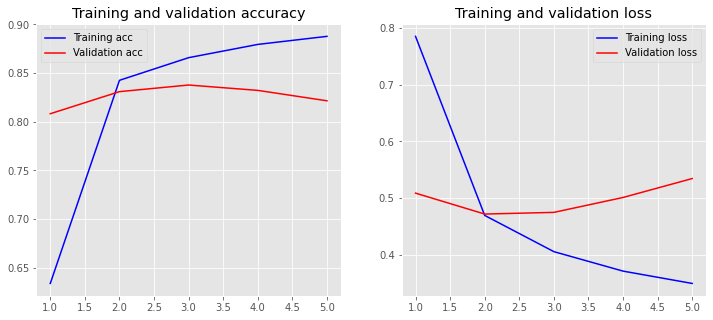

In [92]:
plot_history(history)

# 5 classes


In [77]:
X = df["CleanedTweet"].copy()
y = df["Sentiment"].copy()


def reclass_5(x):
      if x == "Extremely Negative":
        return 1
      if x == "Negative":
        return 2
      if x == "Positive":
        return 3
      if x == "Extremely Positive":
        return 4
      return 0

y = y.apply(lambda x:reclass_5(x))
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

num_classes = 5
y.value_counts(normalize= True)
max_input = np.max(X.apply(lambda tweet: len(tweet)))
y

0        0
1        3
2        3
3        3
4        1
        ..
41152    0
41153    1
41154    3
41155    0
41156    2
Name: Sentiment, Length: 41141, dtype: int64

In [81]:
tk = Tokenizer(num_words=5000)
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index)+1
X_train= tk.texts_to_sequences(X_train)
X_test = tk.texts_to_sequences(X_test)
maxlen=280
X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)


In [82]:
embedding_dim = 16
model = keras.Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(Bidirectional(GRU(256, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=num_classes,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 16)           708208    
_________________________________________________________________
bidirectional (Bidirectional (None, 280, 512)          420864    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,162,229
Trainable params: 1,162,229
Non-trainable params: 0
______________________________________________

In [85]:
history = model.fit(X_train,y_train,epochs=5,shuffle=True,validation_data=(X_test,y_test),batch_size=65,validation_split=0.1)

loss,accuracy = model.evaluate(X_train,y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
428/428 [==============================] - 252s 589ms/step - loss: 1.2080 - accuracy: 0.4951 - val_loss: 0.9268 - val_accuracy: 0.6445
Epoch 2/5
428/428 [==============================] - 247s 576ms/step - loss: 0.8512 - accuracy: 0.6966 - val_loss: 0.8402 - val_accuracy: 0.6844
Epoch 3/5
428/428 [==============================] - 247s 577ms/step - loss: 0.7547 - accuracy: 0.7363 - val_loss: 0.7852 - val_accuracy: 0.7165
Epoch 4/5
428/428 [==============================] - 252s 589ms/step - loss: 0.7040 - accuracy: 0.7606 - val_loss: 0.8013 - val_accuracy: 0.7216
Epoch 5/5
965/965 [==============================] - 81s 84ms/step - loss: 0.5594 - accuracy: 0.8078
Training Accuracy: 0.8078
322/322 [==============================] - 28s 86ms/step - loss: 0.8268 - accuracy: 0.7226
Testing Accuracy:  0.7226


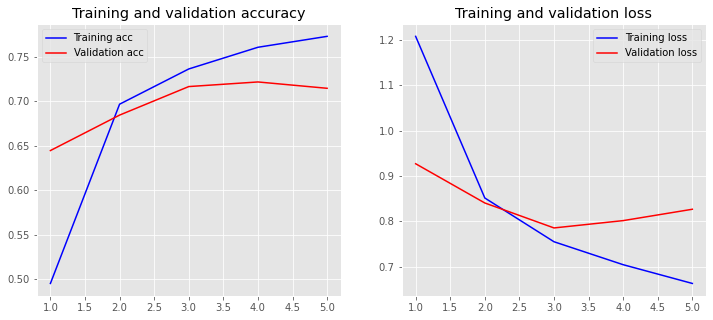

In [118]:
plot_history(history)

In [137]:
def cleaning_result(dirty_list):
  res = []
  for dirty_text in dirty_list:
    res.append(preprocess(dirty_text))
  return res

In [138]:
cleaning_result(["hello!! ?" , "hi! I am using whatsapp."])

['hello', 'hi using whatsapp']

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding,Dense,Flatten,MaxPooling1D,Dropout,LSTM,SpatialDropout1D,Bidirectional,GRU,GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
def reclass_3(x):
  if x == "Extremely Negative":
    return 1
  if x == "Negative":
    return 1
  if x == "Positive":
    return 2
  if x == "Extremely Positive":
    return 2
  return 0


def testing_result(path):
    df = pd.read_csv(path)
    X = df["OriginalTweet"].apply(lambda tweet: preprocess(tweet))
    y = df["Sentiment"]
    y = y.apply(lambda x:reclass_3(x))
    model = keras.models.load_model('3classes.h5')
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
    
    tk = Tokenizer(num_words=5000)
    tk.fit_on_texts(X_train)
    vocab_size = len(tk.word_index)+1
    X_train= tk.texts_to_sequences(X_train)
    X_test = tk.texts_to_sequences(X_test)
    maxlen= np.max(X.apply(lambda tweet: len(tweet)))
    X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
    X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)
    loss,accuracy = model.evaluate(X_train,y_train)
    print("Training Accuracy: {:.4f}".format(accuracy))
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Testing Accuracy:  {:.4f}".format(accuracy))

testing_result('Corona_NLP_test.csv')

89/89 [==============================] - 7s 71ms/step - loss: 2.1172 - accuracy: 0.4263
Training Accuracy: 0.4263
30/30 [==============================] - 3s 72ms/step - loss: 2.1233 - accuracy: 0.4316
Testing Accuracy:  0.4316


# Accuracy Table

In [90]:
acc_table = pd.DataFrame({"Model":["MultiNomialNB TF-IDF","RidgeClassifier TF-IDF","RidgeClassifier BOW","LogisticRegrission BOW","LinearSVC BOW","LinearSVC TF-IDF",
                                 "LinearSVC BOW 2 classes","BI-LSTM 5 classes","BI-GRU 3 classes sigmoid","BI-GRU 3 classes softmax","BI-GRU 5 classes softmax"],
                          
                          "Test Accuract":[0.38780867198133384,0.5329574178495042,0.5357767839782228,0.5796227882558818
                          ,0.5880808866420377,0.5643593233521291,0.8646094964717139,0.6109,0.8219,0.8328,0.7226],
                          "Train Accuracy":["-","-","-","-","-","-","-",0.9959,0.8986,0.9047,0.8078]
                         })
acc_table


,Model,Test Accuract,Train Accuracy
0,MultiNomialNB TF-IDF,0.387809,-
1,RidgeClassifier TF-IDF,0.532957,-
2,RidgeClassifier BOW,0.535777,-
3,LogisticRegrission BOW,0.579623,-
4,LinearSVC BOW,0.588081,-
5,LinearSVC TF-IDF,0.564359,-
6,LinearSVC BOW 2 classes,0.864609,-
7,BI-LSTM 5 classes,0.610900,0.9959
8,BI-GRU 3 classes sigmoid,0.821900,0.8986
9,BI-GRU 3 classes softmax,0.832800,0.9047
